In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import scipy
import seaborn as sns
import math
from scipy import stats
import tensorflow as tf

In [47]:
import sys
print(sys.version)
print(tf.__version__)
pd.show_versions()

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
2.6.0


/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)



INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.12.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.104+
Version          : #1 SMP Sat Jun 5 09:50:34 PDT 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.19.5
pytz             : 2018.9
dateutil         : 2.8.2
pip              : 21.1.3
setuptools       : 57.4.0
Cython           : 0.29.24
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.5
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1.

### **Data Processing**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fire_data.csv to Fire_data.csv


In [ ]:
df = pd.read_csv('Fire_data.csv')
df2=df.copy()
df2.head(10)

,latitude,longitude,quarter,year,sum_etage_hors_sol,sum_nombre_logement,nombre_logement_per_population,avg_annee_construction,sum_superficie_terrain,area,area_per_population,population,dwellings,dwellings_per_population,households,households_per_population,averagehouseholdsize,averageage,averagesizeofcensusfamilies,workers,workers_per_population,caserne_count,incendie_count,sum_superficie_batiment,superficie_batiment_per_population,incendie_count_last_100,incendie_count_last_300,alarm_incendie_count_last_100,total_crimes_last_100,vols_count_last_100,mefait_count_last_100,vol_de_vehicule_count_last_100,introduction_count_last_100,infractions_entrainant_count_last_100
0,45.40,-73.96,2,2017,0,0,0.000000,1900.00,2732,1.57174,0.004465,352,162,0.460227,149,0.423295,2.3,42.0,2.7,100,0.284091,0,0,831,2.360795,0,0,1,0,0,0,0,0,0
1,45.40,-73.96,3,2019,0,0,0.000000,1900.00,2732,1.57174,0.004465,352,162,0.460227,149,0.423295,2.3,42.0,2.7,100,0.284091,0,0,831,2.360795,0,0,0,0,0,0,0,0,0
2,45.41,-73.95,1,2015,728,730,2.324841,1949.98,253537,0.21093,0.000672,314,7,0.022293,0,0.000000,0.0,91.6,0.0,0,0.000000,0,0,80990,257.929936,0,0,0,0,0,0,0,0,0
3,45.41,-73.95,2,2015,728,730,2.324841,1949.98,253537,0.21093,0.000672,314,7,0.022293,0,0.000000,0.0,91.6,0.0,0,0.000000,0,0,80990,257.929936,0,0,2,5,1,1,1,1,0
4,45.41,-73.95,3,2015,728,730,2.324841,1949.98,253537,0.21093,0.000672,314,7,0.022293,0,0.000000,0.0,91.6,0.0,0,0.000000,0,0,80990,257.929936,0,0,3,7,1,2,1,1,0
5,45.41,-73.95,4,2015,728,730,2.324841,1949.98,253537,0.21093,0.000672,314,7,0.022293,0,0.000000,0.0,91.6,0.0,0,0.000000,0,0,80990,257.929936,0,0,1,7,0,1,2,2,0
6,45.41,-73.95,1,2016,728,730,2.324841,1949.98,253537,0.21093,0.000672,314,7,0.022293,0,0.000000,0.0,91.6,0.0,0,0.000000,0,1,80990,257.929936,1,1,0,3,0,2,0,1,0
7,45.41,-73.95,2,2016,728,730,2.324841,1949.98,253537,0.21093,0.000672,314,7,0.022293,0,0.000000,0.0,91.6,0.0,0,0.000000,0,0,80990,257.929936,1,1,4,2,0,2,0,0,0
8,45.41,-73.95,3,2016,728,730,2.324841,1949.98,253537,0.21093,0.000672,314,7,0.022293,0,0.000000,0.0,91.6,0.0,0,0.000000,0,0,80990,257.929936,0,1,2,4,0,1,0,2,0
9,45.41,-73.95,4,2016,728,730,2.324841,1949.98,253537,0.21093,0.000672,314,7,0.022293,0,0.000000,0.0,91.6,0.0,0,0.000000,0,0,80990,257.929936,0,1,0,3,1,0,0,2,0


In [ ]:
!pip install geopy 
import geopy.distance

def dist(x,y):
  coords_1 = (45.504654, -73.56546)
  coords_2 = (x, y)
  return geopy.distance.distance(coords_1, coords_2).km

df2['distance']=0

for i in range(0,len(df2)-1):
  df2['distance'][i]=dist(df2['latitude'][i], df2['longitude'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
df2['fire'] = df2['incendie_count']
df2['fire'][df2['incendie_count']==0] = 0
df2['fire'][(df2['incendie_count']==1)] = 1
df2['fire'][df2['incendie_count']>=2] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
df2 = df2.drop("latitude", axis=1)
df2 = df2.drop("longitude", axis=1)      
df2 = df2.drop("incendie_count", axis=1)
df3 = df2.drop("year",axis=1)
df3 = df3.drop("quarter",axis=1)
df2['fire'].value_counts()

0    7633
1    2644
2    1566
Name: fire, dtype: int64

In [ ]:
corr_matrix = df2.corr()
X_raw=df3.drop("fire", axis=1)
corr_matrix["fire"].sort_values(ascending=False)

fire                                     1.000000
incendie_count_last_100                  0.505725
sum_nombre_logement                      0.503540
incendie_count_last_300                  0.489631
sum_etage_hors_sol                       0.445073
total_crimes_last_100                    0.432339
introduction_count_last_100              0.404394
mefait_count_last_100                    0.403223
alarm_incendie_count_last_100            0.397760
vols_count_last_100                      0.321872
vol_de_vehicule_count_last_100           0.218539
households_per_population                0.202810
caserne_count                            0.163537
dwellings_per_population                 0.153500
sum_superficie_batiment                  0.133144
sum_superficie_terrain                   0.085039
dwellings                                0.067331
infractions_entrainant_count_last_100    0.063383
households                               0.040217
nombre_logement_per_population           0.025062


In [ ]:
from sklearn import preprocessing

# standardize X and y before fitting multiple linear model
X = pd.DataFrame(preprocessing.scale(X_raw))
y = df3['fire'].copy()

In [ ]:
X_train = X[df2['year'] < 2019]
y_train = y[df2['year'] < 2019]

X_test = X[(df2['year']==2019) & (df2['quarter']==1)]
y_test = y[(df2['year']==2019) & (df2['quarter']==1)]
len(X_train),len(y_train),len(X_test),len(y_test)

(7999, 7999, 494, 494)

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = tree_clf.predict(X_test)
confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
y_train_pred = tree_clf.predict(X_train)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[224  74  18]
 [ 66  30  13]
 [ 25  19  25]]
Train score 0.9968746093261658
Test score 0.5647773279352226


In [ ]:
from sklearn.model_selection import GridSearchCV 



param_test1 = {
  'max_depth':(2,6,10,100,200,500,1000),
  'max_features':(2,5,10,15,20,100),
}
gsearch1 = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_test1,scoring='accuracy', n_jobs=4, cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.cv_results_

{'mean_fit_time': array([0.02005153, 0.02261953, 0.0266984 , 0.03015084, 0.0389617 ,
        0.00695763, 0.01054406, 0.02493205, 0.05304813, 0.07794189,
        0.10103106, 0.00743799, 0.0216496 , 0.04350371, 0.09359584,
        0.11549888, 0.16834073, 0.0138701 , 0.03786073, 0.078582  ,
        0.11098223, 0.18344779, 0.23863306, 0.01232605, 0.044523  ,
        0.06674256, 0.12554255, 0.19963059, 0.25215621, 0.01337128,
        0.0364994 , 0.06812739, 0.1332242 , 0.17190003, 0.23823829,
        0.01026888, 0.04519072, 0.07181196, 0.12842603, 0.15732732,
        0.18296142, 0.00963888]),
 'mean_score_time': array([0.00449343, 0.00345874, 0.0086484 , 0.00210099, 0.00189576,
        0.        , 0.00191846, 0.00486784, 0.00549226, 0.00196381,
        0.0067122 , 0.        , 0.00676317, 0.00305653, 0.00912709,
        0.00571589, 0.00673013, 0.        , 0.00508547, 0.00734391,
        0.00779881, 0.00622191, 0.00605054, 0.        , 0.00682597,
        0.00698676, 0.0068295 , 0.00407066, 0.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=6,max_features=10)
tree_clf.fit(X_train, y_train)
y_test_pred = tree_clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = tree_clf.predict(X_test)
confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
y_train_pred = tree_clf.predict(X_train)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[283  21  12]
 [ 71  25  13]
 [ 26  13  30]]
Train score 0.6977122140267533
Test score 0.6842105263157895


In [ ]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 4.24295461e-05 1.53954429e-04 1.68026956e-04
 1.78452641e-04 1.81858402e-04 2.00574522e-04 2.07137961e-04
 2.27686507e-04 2.30235256e-04 2.63921879e-04 2.65219556e-04
 2.65971316e-04 2.82442713e-04 3.05395317e-04 3.34676073e-04
 3.51752306e-04 3.52518446e-04 3.98008935e-04 3.98849018e-04
 4.05106327e-04 4.13061281e-04 4.72712263e-04 4.73288824e-04
 4.77191378e-04 4.91549217e-04 4.92101179e-04 5.30384356e-04
 5.43141086e-04 5.81301242e-04 5.81592515e-04 5.88265107e-04
 5.90199435e-04 6.00561315e-04 6.17975884e-04 6.70915300e-04
 6.91284343e-04 7.27858098e-04 7.33158237e-04 8.21258663e-04
 8.35678794e-04 8.92695214e-04 1.04459315e-03 1.14486331e-03
 1.24799621e-03 1.28901719e-03 2.62326199e-03 4.48562361e-03
 5.04427882e-03 7.75111158e-03 9.20796294e-03 1.37205391e-02
 5.58333590e-02]


In [ ]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

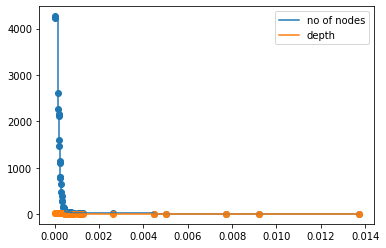

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

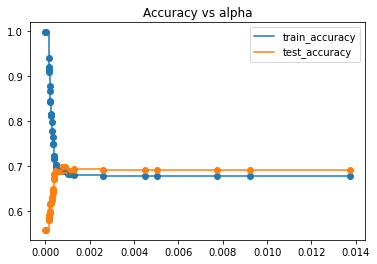

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf_ = DecisionTreeClassifier(random_state=0,ccp_alpha=0.0025)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 0.6788348543567946
Test score 0.6923076923076923


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = clf_.predict(X_test)
confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
accuracy_score = accuracy_score(y_test, y_test_pred)
print(confusion_matrix_valid, accuracy_score) 

[[302   0  14]
 [ 91   0  18]
 [ 29   0  40]] 0.6923076923076923


https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial

### **Neural Network**


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
model = keras.models.Sequential([   
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="sigmoid")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30)
model.evaluate(X_test, y_test)

Epoch 1/30
250/250 [==============================] - 1s 2ms/step - loss: 0.7938 - accuracy: 0.6566
Epoch 2/30
250/250 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.6848
Epoch 3/30
250/250 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.6871
Epoch 4/30
250/250 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.6908
Epoch 5/30
250/250 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.6885
Epoch 6/30
250/250 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.6888
Epoch 7/30
250/250 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.6888
Epoch 8/30
250/250 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.6912
Epoch 9/30
250/250 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.6918
Epoch 10/30
250/250 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.6915

[0.7294379472732544, 0.6862348318099976]

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
import tensorflow.keras.backend as K

dflist = []

optimizers = ['SGD(learning_rate=0.01)',
              'SGD(learning_rate=0.01, momentum=0.3)',
              'SGD(learning_rate=0.01, momentum=0.3, nesterov=True)',  
              'Adam(learning_rate=0.01)',
              'Adagrad(learning_rate=0.01)',
              'RMSprop(learning_rate=0.01)']

for opt_name in optimizers:

    K.clear_session()    
    model = keras.models.Sequential([   
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="sigmoid")])    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)    
    print(opt_name)
    print(model.evaluate(X_test, y_test))

SGD(learning_rate=0.01)
16/16 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.6883
[0.7278109788894653, 0.6882591247558594]
SGD(learning_rate=0.01, momentum=0.3)
16/16 [==============================] - 0s 2ms/step - loss: 0.7238 - accuracy: 0.6943
[0.7238156199455261, 0.6943320035934448]
SGD(learning_rate=0.01, momentum=0.3, nesterov=True)
16/16 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.6923
[0.7229474782943726, 0.692307710647583]
Adam(learning_rate=0.01)
16/16 [==============================] - 0s 2ms/step - loss: 0.7414 - accuracy: 0.6862
[0.7414220571517944, 0.6862348318099976]
Adagrad(learning_rate=0.01)
16/16 [==============================] - 0s 2ms/step - loss: 0.7251 - accuracy: 0.6862
[0.7250977754592896, 0.6862348318099976]
RMSprop(learning_rate=0.01)
16/16 [==============================] - 0s 2ms/step - loss: 0.7563 - accuracy: 0.6964
[0.7563157081604004, 0.6963562965393066]


In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
import tensorflow.keras.backend as K

dflist = []

batch_sizes = [16, 32, 64, 128,1000]

for batch_size in batch_sizes:
    K.clear_session()    
    model = keras.models.Sequential([   
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="sigmoid")])    

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0, epochs=10)
    print(batch_size)
    print(model.evaluate(X_test, y_test))

16
16/16 [==============================] - 0s 2ms/step - loss: 0.7237 - accuracy: 0.6943
[0.7236694693565369, 0.6943320035934448]
32
16/16 [==============================] - 0s 1ms/step - loss: 0.7226 - accuracy: 0.6923
[0.7225515842437744, 0.692307710647583]
64
16/16 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.6862
[0.7227292060852051, 0.6862348318099976]
128
16/16 [==============================] - 0s 2ms/step - loss: 0.7360 - accuracy: 0.6964
[0.7359642386436462, 0.6963562965393066]
1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7806 - accuracy: 0.6802
[0.7806000113487244, 0.6801619529724121]


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
model = keras.models.Sequential([   
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])
model.add(BatchNormalization())
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)



Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 4.7669 - accuracy: 0.5206
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 2.6494 - accuracy: 0.6390
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 2.6495 - accuracy: 0.6390
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 2.6495 - accuracy: 0.6390
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 2.6492 - accuracy: 0.6390
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 2.6494 - accuracy: 0.6390
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 2.6494 - accuracy: 0.6390
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 2.6494 - accuracy: 0.6390
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 2.6494 - accuracy: 0.6390
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 2.7792 - accuracy: 0.6397


[2.7791640758514404, 0.6396760940551758]

In [ ]:
dflist = []

learning_rates = [.001,0.01, 0.05, 0.1, 0.5,1]

for learning_rate in learning_rates:
    K.clear_session()    
    model = keras.models.Sequential([   
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="sigmoid")])    

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=SGD(learning_rate=learning_rate),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=128, verbose=0, epochs=10)
    print(learning_rate)
    print(model.evaluate(X_test, y_test))

0.001
16/16 [==============================] - 0s 2ms/step - loss: 0.7951 - accuracy: 0.6700
[0.7950705289840698, 0.670040488243103]
0.01
16/16 [==============================] - 0s 2ms/step - loss: 0.7320 - accuracy: 0.6964
[0.7319791913032532, 0.6963562965393066]
0.05
16/16 [==============================] - 0s 1ms/step - loss: 0.7244 - accuracy: 0.6862
[0.7243712544441223, 0.6862348318099976]
0.1
16/16 [==============================] - 0s 2ms/step - loss: 0.7292 - accuracy: 0.6842
[0.7292081713676453, 0.6842105388641357]
0.5
16/16 [==============================] - 0s 1ms/step - loss: 0.7382 - accuracy: 0.6903
[0.7382389307022095, 0.6902834177017212]
1
16/16 [==============================] - 0s 1ms/step - loss: 0.7413 - accuracy: 0.6640
[0.7413225173950195, 0.6639676094055176]


In [ ]:
dflist = []

initializers = ['zeros', 
                'uniform', 
                'normal',
                'he_normal', 
                'lecun_uniform']

for initializers in initializers:
    K.clear_session()    
    model = keras.models.Sequential([   
    keras.layers.Dense(300, activation="relu",kernel_initializer=initializers),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="sigmoid")])    

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=SGD(learning_rate=learning_rate),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=128, verbose=0, epochs=10)
    print(initializers)
    print(model.evaluate(X_test, y_test))


zeros
16/16 [==============================] - 0s 1ms/step - loss: 0.8944 - accuracy: 0.6397
[0.8944491744041443, 0.6396760940551758]
uniform
16/16 [==============================] - 0s 1ms/step - loss: 0.7339 - accuracy: 0.6781
[0.7339420914649963, 0.6781376600265503]
normal
16/16 [==============================] - 0s 2ms/step - loss: 0.7473 - accuracy: 0.6700
[0.7473315596580505, 0.670040488243103]
he_normal
16/16 [==============================] - 0s 2ms/step - loss: 0.7908 - accuracy: 0.6700
[0.7907854914665222, 0.670040488243103]
lecun_uniform
16/16 [==============================] - 0s 1ms/step - loss: 0.7495 - accuracy: 0.6761
[0.7495310306549072, 0.6761133670806885]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict(X_test)
#confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
#accuracy_score = accuracy_score(y_test, y_test_pred)
#print(confusion_matrix_valid, accuracy_score) 

### **ADAboost**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.6895861982747844
Test score 0.6842105263157895


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=50,
    algorithm="SAMME.R", learning_rate=1, random_state=42)
ada_clf.fit(X_train, y_train)
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.6848356044505564
Test score 0.680161943319838


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=5, random_state=42)
ada_clf.fit(X_train, y_train)
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.23015376922115263
Test score 0.22064777327935223


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=50,
    algorithm="SAMME.R", learning_rate=.01, random_state=42)
ada_clf.fit(X_train, y_train)
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.6389548693586699
Test score 0.6396761133603239


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=1, random_state=42)
ada_clf.fit(X_train, y_train)
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.6863357919739967
Test score 0.6902834008097166


### **SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC


param_test1 = {
  'gamma':(0.01,0.05,0.1),
   'C':(.001,.01,.1,1,1000) 
}
gsearch1 = GridSearchCV(estimator = SVC(class_weight='balanced'), 
param_grid = param_test1,scoring='accuracy', n_jobs=10,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([ 24.80978155,  38.50335512,  41.38976321,  34.0767252 ,
         34.91131563,  38.54928074,  28.52338204,  29.18693199,
         30.53013282,  26.03620787,  27.33471274,  27.20499449,
        117.56066651, 127.19807487,  54.53532734]),
 'mean_score_time': array([3.33666573, 4.7393827 , 4.77883787, 4.45925193, 4.41492352,
        4.61119604, 3.8521596 , 3.90343318, 3.92521353, 3.62804551,
        3.64599371, 3.71699567, 3.26683993, 2.52766156, 1.16684132]),
 'mean_test_score': array([0.15140369, 0.13089134, 0.13089134, 0.62082989, 0.54982403,
        0.49744176, 0.5974538 , 0.55095098, 0.50831864, 0.58320364,
        0.49482411, 0.45944567, 0.42331997, 0.38256246, 0.38781066]),
 'param_C': masked_array(data=[0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1,
                    1, 1, 1, 1000, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fi

In [ ]:
from sklearn.svm import SVC

final = SVC(C=0.01, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
final.fit(X_train, y_train)
y_train_pred= final.predict(X_train)
y_test_pred = final.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[241  50  25]
 [ 54  30  25]
 [  7  18  44]]
Train score 0.6314539317414677
Test score 0.6376518218623481


In [ ]:
from sklearn.svm import SVC

final = SVC(C=0.001, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
final.fit(X_train, y_train)
y_train_pred= final.predict(X_train)
y_test_pred = final.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[157   0 159]
 [ 22   0  87]
 [  3   0  66]]
Train score 0.45405675709463683
Test score 0.451417004048583


In [ ]:
from sklearn.svm import SVC

final = SVC(C=0.001, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
final.fit(X_train, y_train)
y_train_pred= final.predict(X_train)
y_test_pred = final.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[  0   0 316]
 [  0   0 109]
 [  0   0  69]]
Train score 0.13089136142017752
Test score 0.1396761133603239


In [ ]:
from sklearn.svm import SVC

final = SVC(C=0.1, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
final.fit(X_train, y_train)
y_train_pred= final.predict(X_train)
y_test_pred = final.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[222  70  24]
 [ 41  41  27]
 [  5  19  45]]
Train score 0.6300787598449806
Test score 0.6234817813765182


In [ ]:
from sklearn.svm import SVC

final = SVC(C=0.1, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
final.fit(X_train, y_train)
y_train_pred= final.predict(X_train)
y_test_pred = final.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[192  79  45]
 [ 32  37  40]
 [  3  18  48]]
Train score 0.5913239154894362
Test score 0.5607287449392713


In [ ]:
from sklearn.svm import SVC

final = SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
final.fit(X_train, y_train)
y_train_pred= final.predict(X_train)
y_test_pred = final.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[199  93  24]
 [ 44  43  22]
 [ 14  23  32]]
Train score 0.7985998249781223
Test score 0.5546558704453441


https://github.com/ageron/handson-ml2

In [ ]:
## Polynomial Kernel

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

poly100_kernel_svm_clf = Pipeline([
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=100, C=5,cache_size=200000))
    ])
poly100_kernel_svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200000,
                     class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=2, gamma='scale',
                     kernel='poly', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:

y_train_pred= poly100_kernel_svm_clf.predict(X_train)
y_test_pred = poly100_kernel_svm_clf.predict(X_test)
confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)

accuracy_score = accuracy_score(y_test, y_test_pred)
print(confusion_matrix_valid, accuracy_score) 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[303   4   9]
 [ 93   6  10]
 [ 31   7  31]] 0.6882591093117408
Train score 0.7022127765970746
Test score 0.6882591093117408


### **kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

leaf_size = list(range(1,50,2))
n_neighbors = list(range(180,300,20))

param_test1 = {
  'leaf_size':(1,5,101,5,20,25,30,35,40,45,50,100),
   'n_neighbors':(180,200,230,250,300,400,500) 
}


gsearch1 = GridSearchCV(estimator = KNeighborsClassifier(),param_grid = param_test1,scoring='accuracy', n_jobs=10,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'mean_fit_time': array([0.17990704, 0.38943577, 0.33240843, 0.33824224, 0.34046884,
        0.33506761, 0.33721657, 0.26007996, 0.27559934, 0.24712958,
        0.27554007, 0.27173429, 0.2638351 , 0.26179109, 0.16667676,
        0.17440505, 0.18087502, 0.17912402, 0.17319751, 0.18051724,
        0.17921357, 0.29420514, 0.26921439, 0.27709026, 0.27196169,
        0.26145372, 0.27209759, 0.26643815, 0.22121429, 0.23018327,
        0.22743711, 0.22676864, 0.23355651, 0.23948712, 0.22753596,
        0.20973258, 0.21833892, 0.22008967, 0.21023178, 0.21381407,
        0.21481028, 0.21239653, 0.2035965 , 0.21727347, 0.21146536,
        0.2103816 , 0.21983576, 0.21390524, 0.21387224, 0.21978769,
        0.21436672, 0.21405454, 0.21367245, 0.2126287 , 0.21528368,
        0.21903071, 0.21374454, 0.22065568, 0.21173887, 0.21493626,
        0.21034555, 0.21692624, 0.20491471, 0.2010344 , 0.21110926,
        0.21156693, 0.21076884, 0.21526623, 0.20695424, 0.225734  ,
        0.19657764, 0.19598441,

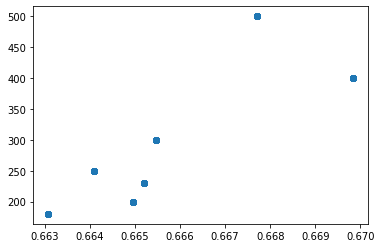

In [ ]:



plt.scatter(gsearch1.cv_results_['mean_test_score'],gsearch1.cv_results_['param_n_neighbors'])
#gsearch1.cv_results_['param_leaf_size'], gsearch1.cv_results_['mean_test_score']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


param_knn = {}
param_knn['n_neighbors'] = 400
param_knn['leaf_size'] = 50

knn = KNeighborsClassifier(**param_knn)
knn.fit(X_train,y_train)

y_test_pred = knn.predict(X_test)
y_train_pred= knn.predict(X_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.677584698087261
Test score 0.6821862348178138


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


param_knn = {}
param_knn['n_neighbors'] = 400
param_knn['leaf_size'] = 25

knn = KNeighborsClassifier(**param_knn)
knn.fit(X_train,y_train)

y_test_pred = knn.predict(X_test)
y_train_pred= knn.predict(X_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.677584698087261
Test score 0.6821862348178138


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


param_knn = {}
param_knn['n_neighbors'] = 400
param_knn['leaf_size'] = 100

knn = KNeighborsClassifier(**param_knn)
knn.fit(X_train,y_train)

y_test_pred = knn.predict(X_test)
y_train_pred= knn.predict(X_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.677584698087261
Test score 0.6821862348178138


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


param_knn = {}
param_knn['n_neighbors'] = 200
param_knn['leaf_size'] = 100

knn = KNeighborsClassifier(**param_knn)
knn.fit(X_train,y_train)

y_test_pred = knn.predict(X_test)
y_train_pred= knn.predict(X_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.6810851356419553
Test score 0.6821862348178138


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


param_knn = {}
param_knn['n_neighbors'] = 800
param_knn['leaf_size'] = 100

knn = KNeighborsClassifier(**param_knn)
knn.fit(X_train,y_train)

y_test_pred = knn.predict(X_test)
y_train_pred= knn.predict(X_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.6740842605325665
Test score 0.6761133603238867
